### Clusters on text data

#### About the data

A twitter data is collected for the hashtags "airpollution" and "climatechange". The data is cleaned and pre-processed and the tweets are reduced to root words. Clustering is done on this lemmatized words to know the similarities in the tweets for these particular hashtag. A word cloud is plotted to figure out the most commonly used words in these tweets in order to understand most relatable aspect of air pollution and climate change. The goal is to find the similarities between the tweets with these two hashtags. 


#### Import required libraries

In [564]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [565]:
import numpy as np
import pandas as pd
import os
import re
import warnings
from sys import exit
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
sns.set_theme(style="whitegrid", palette='Set2')
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.decomposition import PCA
from sklearn import metrics
from itertools import cycle

#### Read the data

In [593]:
df1 = pd.read_csv('../../data/newhashtag_data_clean.csv')
df2 = pd.read_csv('../../data/Clean_Twitter_old_data.csv')
df3 = pd.read_csv('../../data/Clean_Twitter_New_data.csv')
df= pd.concat([df1,df2,df3],axis=0)
df.head()

,Unnamed: 0,text,clean_text,Tweet_tokenized,Tweet_without_stop,Tweet_stemmed,Tweet_lemmatized
0,0,"RT @DrRanisharma21: Where is grap, improvement...",RT DrRanisharma Where is grap improvement We r...,"['rt', 'drranisharma', 'where', 'is', 'grap', ...","['rt', 'drranisharma', 'grap', 'improvement', ...","['rt', 'drranisharma', 'grap', 'improv', 'r', ...","['rt', 'drranisharma', 'grap', 'improvement', ..."
1,1,"That's great, the level is below 5 ugr/m3. Tem...",Thats great the level is below ugrm Temperatu...,"['thats', 'great', 'the', 'level', 'is', 'belo...","['thats', 'great', 'level', 'ugrm', 'temperatu...","['that', 'great', 'level', 'ugrm', 'temperatur...","['thats', 'great', 'level', 'ugrm', 'temperatu..."
2,2,RT @GwneudYTro: @CleanAirForCDF @VelindreTrust...,RT GwneudYTro CleanAirForCDF VelindreTrust Mar...,"['rt', 'gwneudytro', 'cleanairforcdf', 'velind...","['rt', 'gwneudytro', 'cleanairforcdf', 'velind...","['rt', 'gwneudytro', 'cleanairforcdf', 'velind...","['rt', 'gwneudytro', 'cleanairforcdf', 'velind..."
3,3,RT @CleanAirCAC: In order to create lasting so...,RT CleanAirCAC In order to create lasting solu...,"['rt', 'cleanaircac', 'in', 'order', 'to', 'cr...","['rt', 'cleanaircac', 'order', 'create', 'last...","['rt', 'cleanaircac', 'order', 'creat', 'last'...","['rt', 'cleanaircac', 'order', 'create', 'last..."
4,4,"RT @icareforlungs: ""When we stop #airpollution...",RT icareforlungs When we stop airpollution we ...,"['rt', 'icareforlungs', 'when', 'we', 'stop', ...","['rt', 'icareforlungs', 'stop', 'airpollution'...","['rt', 'icareforlung', 'stop', 'airpollut', 's...","['rt', 'icareforlungs', 'stop', 'airpollution'..."


In [594]:
twitter_data = df[['Tweet_lemmatized']]
twitter_data['Tweet_lemmatized'] = twitter_data['Tweet_lemmatized'].str.replace('rt', '')
twitter_data.head()

,Tweet_lemmatized
0,"['', 'drranisharma', 'grap', 'improvement', 'r..."
1,"['thats', 'great', 'level', 'ugrm', 'temperatu..."
2,"['', 'gwneudytro', 'cleanairforcdf', 'velindre..."
3,"['', 'cleanaircac', 'order', 'create', 'lastin..."
4,"['', 'icareforlungs', 'stop', 'airpollution', ..."


Stop words are filtered out and all non letters are replaced with a space.

In [595]:
stopwords = set(STOPWORDS)
letters_only = re.sub("[^a-zA-Z]+", " ", str(twitter_data['Tweet_lemmatized'])) #Search for all non-letters and replace with a space

In [596]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(letters_only)

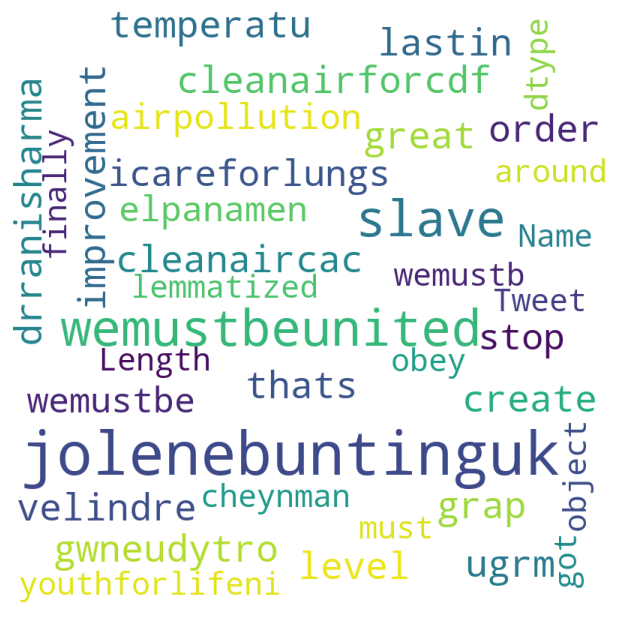

In [597]:
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


In [598]:
#count tweet['lemmatized'] rows
twitter_data['Tweet_lemmatized'].count()


1351

#### Count Vectorizer

It is used to convert a given text into a vector based on the frequency (count) of each word in the entire text. Since there has been no prio dictionary given or no analyzer is used number of features will be equal to the vocabulary size found by analyzing the data.


In [599]:
CV=CountVectorizer(input='content',
                      stop_words='english',
                      #decode_error='ignore'
                      )
The_DTM_CV=CV.fit_transform(twitter_data['Tweet_lemmatized'])
TheColumnNames_CV=CV.get_feature_names()

In [600]:
The_DF=pd.DataFrame(The_DTM_CV.toarray(),columns=TheColumnNames_CV)

In [601]:
The_DF.to_csv("DTM_CV.csv")

Data after applying counter vectorizer on the data.

In [602]:
filename= pd.read_csv("DTM_CV.csv")
filename.head()

,Unnamed: 0,aaj,aajtak,aalstwaalre,aani,aap,aapkagopalrai,aaps,ab,able,...,沖縄で少ない,続き,続く,近畿,非常に多いは注意喚起レベル,首都圏,𝐂𝐫𝐨𝐬𝐬𝐞𝐬,𝐋𝐢𝐧𝐞,𝐑𝐞𝐝,𝐒𝐦𝐨𝐠
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### K-Means clustering on twitter data.

After converting the text data into feature matrix, clustering is performed. A random K value is taken. Here, k = 4 is taken as the inial step to predict the labels. The labels are printed.

In [603]:
k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(filename)   ## run kmeans

labels = kmeans.labels_
print(labels)

centroids = kmeans.cluster_centers_
print(centroids)

prediction = kmeans.predict(filename)
print(prediction)

[2 2 2 ... 1 1 1]
[[ 5.06500000e+02  2.95857988e-03  1.73472348e-17 ...  9.75781955e-19
   9.75781955e-19  9.75781955e-19]
 [ 1.18200000e+03  9.75781955e-19 -3.81639165e-17 ...  9.75781955e-19
   9.75781955e-19  9.75781955e-19]
 [ 1.68500000e+02  9.75781955e-19  7.69230769e-02 ...  9.75781955e-19
   9.75781955e-19  9.75781955e-19]
 [ 8.44500000e+02  9.75781955e-19  2.95857988e-03 ...  2.95857988e-03
   2.95857988e-03  2.95857988e-03]]
[2 2 2 ... 1 1 1]


#### Hyper parameter tuning

Computing the optimal k value using Elbow Method. If the line chart the point of inflection on the curve indicates that the underlying model fits well at that point. 

2
3
4
5
6
[51390351.627444535, 22850503.6231586, 12861173.032886796, 8237843.987662337, 5726521.673996047]
range(2, 7)


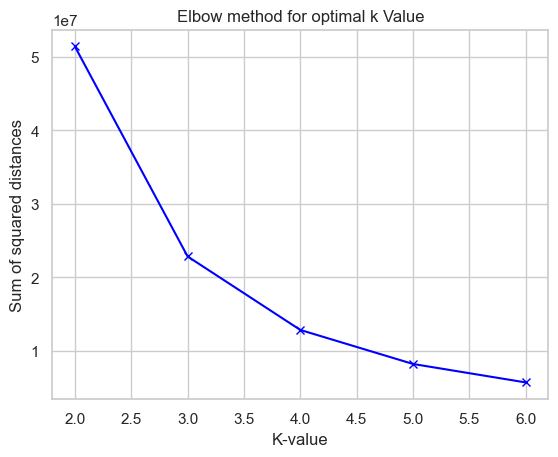

In [604]:
#Look at best values for k 
SS_dist = []

values_for_k=range(2,7)

for k_val in values_for_k:
    print(k_val)
    k_means = KMeans(n_clusters=k_val)
    model = k_means.fit(filename)
    SS_dist.append(k_means.inertia_)
    
print(SS_dist)
print(values_for_k)

plt.plot(values_for_k, SS_dist, 'bx-')
plt.xlabel('K-value')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal k Value')
plt.show()

Looking at Silhouette and Calinski_Harabasz_Score

Calinski_Harabasz_Score - The variance ratio criteria is another name for the Calinski-Harabasz criterion (VRC). Well-defined clusters have a big variance between clusters and a modest variance within clusters.

Text(0.5, 0, 'k values')

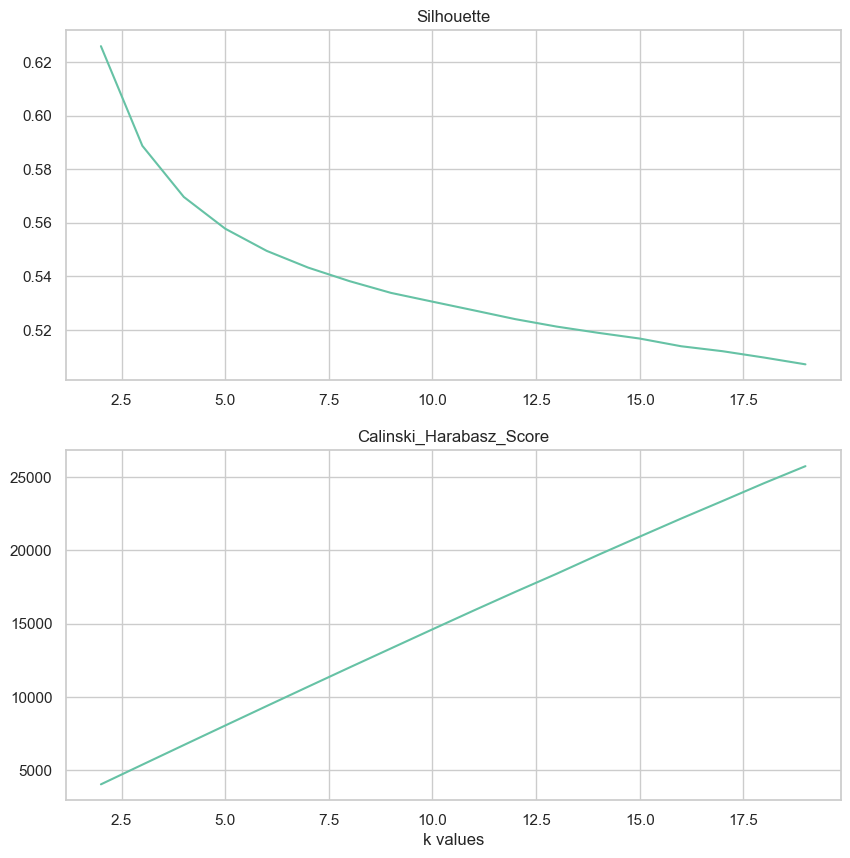

In [605]:
# Look at Silhouette

Sih=[]
Cal=[]
k_range=range(2,20)

for k in k_range:
    k_means_n = KMeans(n_clusters=k)
    model = k_means_n.fit(filename)
    Pred = k_means_n.predict(filename)
    labels_n = k_means_n.labels_
    R1=metrics.silhouette_score(filename, labels_n, metric = 'euclidean')
    R2=metrics.calinski_harabasz_score(filename, labels_n)
    Sih.append(R1)
    Cal.append(R2)


fig1, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
ax1.plot(k_range,Sih)
ax1.set_title("Silhouette")
ax1.set_xlabel("")

ax2.plot(k_range,Cal)
ax2.set_title("Calinski_Harabasz_Score")
ax2.set_xlabel("k values")

From the above methods optimal k value is chosen to be 2. The data is fit into k-means algorithm and is plotted. Principal component analysis (PCA) is a technique used to reduce the dimensionality of such datasets, boosting interpretability while minimizing information loss. It accomplishes this by generating new uncorrelated variables that gradually optimize variance.

In [606]:
#Kmeans for K = 2
km = KMeans(n_clusters=2, random_state=1997)
km.fit(The_DTM_CV)

KMeans(n_clusters=2, random_state=1997)

In [616]:
pca = PCA(n_components=4, random_state=3)
reduced_features = pca.fit_transform(The_DTM_CV.toarray())

# reduce the cluster centers to 2D\
reduced_cluster_centers = pca.transform(km.cluster_centers_)

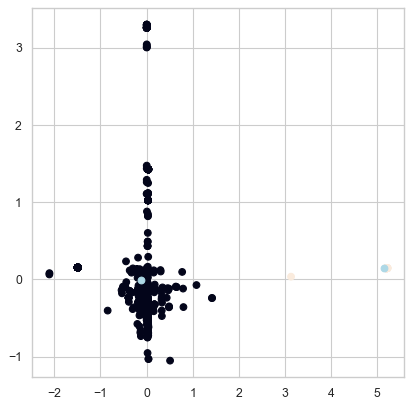

In [625]:
from matplotlib.pyplot import figure

figure(figsize=(6, 6), dpi=80)
plt.scatter(reduced_features[:,0], reduced_features[:,3], c=km.predict(The_DTM_CV))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,3], c='lightblue')



#### DBSCAN for text data

The labels are predicted after taking eps as 6 and min_samples as 2, the unique lables are -1, 0, 1, 2, 3, 4. forming 5 clusters. -1 is the noise.

In [609]:
MyDBSCAN = DBSCAN(eps=6, min_samples=2)
MyDBSCAN.fit_predict(filename)
print(MyDBSCAN.labels_)

[ 0 -1  0 ...  4  4  4]


In [610]:
np.unique(MyDBSCAN.labels_)

array([-1,  0,  1,  2,  3,  4])

Number od fata points for each cluster can be found below. A graph is plotted to demonstrate the same.

In [611]:
#count the number of points in each cluster
from collections import Counter
Counter(MyDBSCAN.labels_)
#-1 means noise


Counter({0: 204, -1: 77, 1: 298, 2: 170, 3: 189, 4: 413})

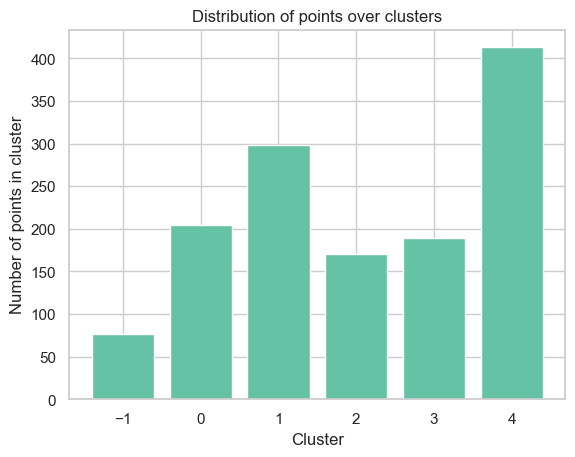

In [612]:
#plot the counter
plt.bar(Counter(MyDBSCAN.labels_).keys(), Counter(MyDBSCAN.labels_).values())
#labels for the graph
plt.xlabel('Cluster')
plt.ylabel('Number of points in cluster')
plt.title('Distribution of points over clusters')
plt.show()
#-1 means noise

#### Heirarchichal clustering for text data.

Aglomerative clustering is performed for 4 clusters, by computing euclidean distance between the points. The labels are extracted. A dendogram is plotted for the clustered data.

[2 2 2 ... 0 0 0]


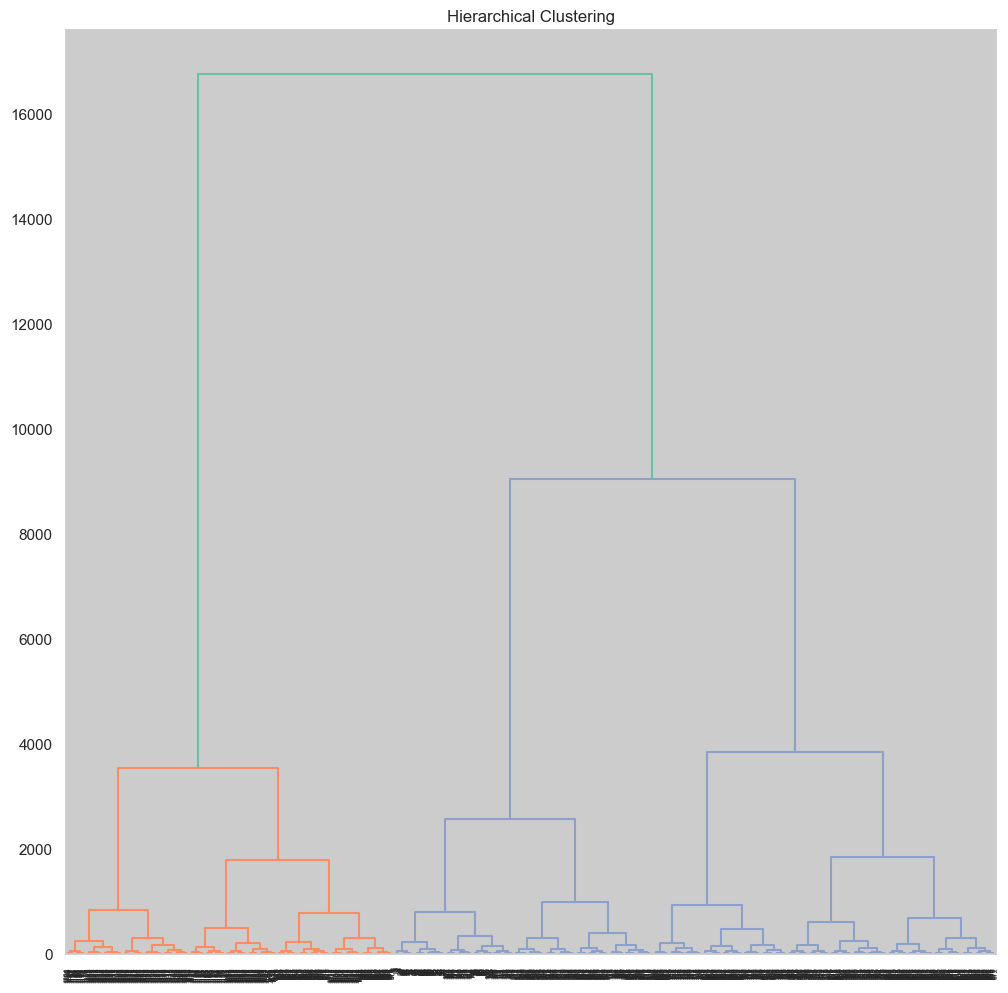

In [613]:
##  Hierarchical 
import scipy.cluster.hierarchy as hc

MyHC = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
FIT=MyHC.fit(filename)
HC_labels = MyHC.labels_
print(HC_labels)


plt.figure(figsize =(12, 12))
plt.title('Hierarchical Clustering')
dendro = hc.dendrogram((hc.linkage(filename, method ='ward')))

In [614]:
np.unique(HC_labels)

array([0, 1, 2, 3])

Number of data points in each cluster can be found below.

In [615]:
#count the number of points in each cluster
from collections import Counter
Counter(HC_labels)

Counter({2: 376, 1: 302, 3: 197, 0: 476})

### Final Results:
- The clusters for this data are overlapping, which could be due to the fact that numerous tweets contain identical terms that relate to distinct topics/labels. This still has room for improvement.
- With k = 4, the Euclidean distance approach was used to plot a dendrogram. As can be observed, the clusters are extremely dense. It represents closely connected words, and comparable words in separate tweets are possible.

### Conclusion
The twitter data with "air pollution" and "climatechange" hashtag was chosen to find out the similarities between the data. From the clusters formed we can say that there are many similar words between tweets with these two hashtags. The aglomerative clustering shows the density of similar words in tweets more accurately than the other two used.